In [47]:
!pip install tensorflow sklearn matplotlib mediapipe opencv-python numpy

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [48]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time as mytime
import mediapipe as mp

## 2. Keypoints using MP Holistic


In [6]:
cap= cv2.VideoCapture(0)
while cap.isOpened():
    #read feed
    ret, frame = cap.read()
    
    #show to screen
    cv2.imshow('OpenCV Feed', frame)
    
    #break from loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()  

In [7]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion
    image.flags.writeable = False #image non writeable
    results = model.process(image) #make prediction
    image.flags.writeable = True #image now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion
    return image, results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,26,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(121,22,16), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,50), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(245,117,6), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,20), thickness=2, circle_radius=2)
                             )  



In [11]:
cap= cv2.VideoCapture(0)

#Access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read feed
        ret, frame = cap.read()


        #make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #draw landmarks
        draw_landmarks(image, results)

        #show to screen
        cv2.imshow('OpenCV Feed', image)

        #break from loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  

    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
results

mediapipe.python.solution_base.SolutionOutputs

In [14]:
draw_landmarks(frame, results)


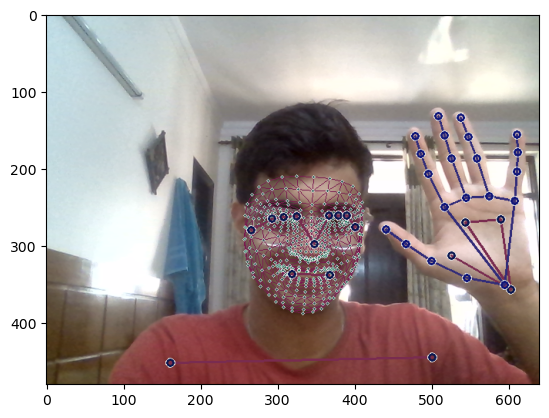

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3. Extract Keypoint Values


In [16]:
results.pose_landmarks

landmark {
  x: 0.5448539853096008
  y: 0.6210922002792358
  z: -1.0854426622390747
  visibility: 0.9999933838844299
}
landmark {
  x: 0.5738305449485779
  y: 0.5448939204216003
  z: -0.9917658567428589
  visibility: 0.9999860525131226
}
landmark {
  x: 0.5921990871429443
  y: 0.5445613265037537
  z: -0.9914337396621704
  visibility: 0.9999879002571106
}
landmark {
  x: 0.610606849193573
  y: 0.5449144244194031
  z: -0.990933895111084
  visibility: 0.9999844431877136
}
landmark {
  x: 0.509178638458252
  y: 0.5478131771087646
  z: -1.0147390365600586
  visibility: 0.9999838471412659
}
landmark {
  x: 0.4818693697452545
  y: 0.549875020980835
  z: -1.0133875608444214
  visibility: 0.9999828934669495
}
landmark {
  x: 0.45805802941322327
  y: 0.5536463856697083
  z: -1.0135176181793213
  visibility: 0.9999768137931824
}
landmark {
  x: 0.6279698014259338
  y: 0.5757209658622742
  z: -0.4749928414821625
  visibility: 0.9999890327453613
}
landmark {
  x: 0.4159761071205139
  y: 0.584260046

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test= np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [20]:
pose.shape

(132,)

In [21]:
len(results.left_hand_landmarks.landmark)*3


63

In [22]:
lh

array([ 9.30706799e-01,  7.31958568e-01,  4.89906768e-07,  8.53330016e-01,
        7.13472426e-01, -2.59428602e-02,  7.81547070e-01,  6.67893171e-01,
       -3.84790488e-02,  7.29902148e-01,  6.22803628e-01, -4.92979847e-02,
        6.90194905e-01,  5.81481636e-01, -5.86479381e-02,  8.08909535e-01,
        5.22706687e-01, -1.37497531e-02,  7.75431335e-01,  4.32343930e-01,
       -3.05250175e-02,  7.60108829e-01,  3.77705455e-01, -4.55059744e-02,
        7.48908401e-01,  3.29534352e-01, -5.73322773e-02,  8.51976335e-01,
        4.96884435e-01, -1.71890873e-02,  8.22395265e-01,  3.91600639e-01,
       -2.98288222e-02,  8.08189511e-01,  3.27852219e-01, -4.23343740e-02,
        7.96285033e-01,  2.76473761e-01, -5.24130538e-02,  8.98504913e-01,
        4.92866784e-01, -2.57634446e-02,  8.73706877e-01,  3.91602069e-01,
       -4.35633063e-02,  8.57543766e-01,  3.31283569e-01, -5.65563589e-02,
        8.41544807e-01,  2.80692518e-01, -6.62884936e-02,  9.50049698e-01,
        5.05251348e-01, -

In [23]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    return np.concatenate([pose, face, rh, lh])

In [25]:
result_test = extract_keypoints(results)

In [26]:
result_test

array([ 0.54485399,  0.6210922 , -1.08544266, ...,  0.95576268,
        0.32505089, -0.07157763])

In [27]:
extract_keypoints(results)[:10]

array([ 0.54485399,  0.6210922 , -1.08544266,  0.99999338,  0.57383054,
        0.54489392, -0.99176586,  0.99998605,  0.59219909,  0.54456133])

In [28]:
np.save('0', result_test)

# 4. Setup Folders for Collection

In [33]:
# path for the exoprted data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#Action that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# 30 videos worth of data
no_sequences = 30

#videos are going to be 30 frames in length
sequence_length = 30

In [48]:
#hello
##0
##1
##2
##29
#thanks

#i love you

In [34]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoints Values for Training and Testing


In [35]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                   
                    cv2.waitKey(750)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    #cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                cv2.imshow('OpenCV Feed', image)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [36]:
cap.release()
cap.destroyAllWindows()

AttributeError: 'cv2.VideoCapture' object has no attribute 'destroyAllWindows'

## 6. Preprocess Data and Create labels and Features

In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [39]:
label_map = {label:num for num, label in enumerate(actions)}

In [40]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [42]:
sequences, labels =[], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        
        

In [50]:
np.array(sequences).shape

(90, 30, 1662)

In [51]:
np.array(labels).shape

(90,)

In [52]:
X = np.array(sequences)

In [53]:
X.shape

(90, 30, 1662)

In [54]:
y = to_categorical(labels).astype(int)

In [55]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [60]:
y_train.shape

(85, 3)

## 7. Build and train LSTM Neural Network

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [63]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir )

In [94]:
model = Sequential()
model.add(LSTM(64, return_sequences= True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences= True, activation= 'relu'))
model.add(LSTM(64, return_sequences= False, activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [66]:
res = [.7, 0.2, 0.1]

In [67]:
actions[np.argmax(res)]

'hello'

In [96]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['categorical_accuracy'])


In [97]:
model.fit(X_train, y_train,epochs = 1800, callbacks=[tb_callback])

Epoch 1/1800
3/3 [==============================] - 3s 76ms/step - loss: 1.6775 - categorical_accuracy: 0.2706
Epoch 2/1800
3/3 [==============================] - 0s 71ms/step - loss: 3.2251 - categorical_accuracy: 0.3412
Epoch 3/1800
3/3 [==============================] - 0s 72ms/step - loss: 10.9484 - categorical_accuracy: 0.2588
Epoch 4/1800
3/3 [==============================] - 0s 75ms/step - loss: 5.8822 - categorical_accuracy: 0.3294
Epoch 5/1800
3/3 [==============================] - 0s 71ms/step - loss: 5.6394 - categorical_accuracy: 0.2353
Epoch 6/1800
3/3 [==============================] - 0s 65ms/step - loss: 5.6739 - categorical_accuracy: 0.4118
Epoch 7/1800
3/3 [==============================] - 0s 66ms/step - loss: 8.7298 - categorical_accuracy: 0.2706
Epoch 8/1800
3/3 [==============================] - 0s 72ms/step - loss: 5.2953 - categorical_accuracy: 0.4118
Epoch 9/1800
3/3 [==============================] - 0s 71ms/step - loss: 4.0906 - categorical_accuracy: 0.2706


KeyboardInterrupt: 

## 8. Make Predictions

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [73]:
res = model.predict(X_test)

1/1 [==============================] - 0s 340ms/step


In [90]:
actions[np.argmax(res[0])]

'hello'

In [91]:
actions[np.argmax(y_test[0])]

'hello'

## 9. save the weights

In [92]:
model.save('actions.h5')

NameError: name 'model' is not defined

In [82]:
del model

In [98]:
model.load_weights('actions.h5')

## 10. Evaluation using confusion Matrix and Accuracy

In [99]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [101]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 327ms/step


In [102]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [104]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [1, 1]],

       [[2, 0],
        [0, 3]],

       [[4, 1],
        [0, 0]]], dtype=int64)

In [105]:
accuracy_score(ytrue, yhat)

0.8

## 11. Test in Real Time 

In [112]:
colors= [(245, 117, 16), (117,245,16), (16, 117, 245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    return output_frame

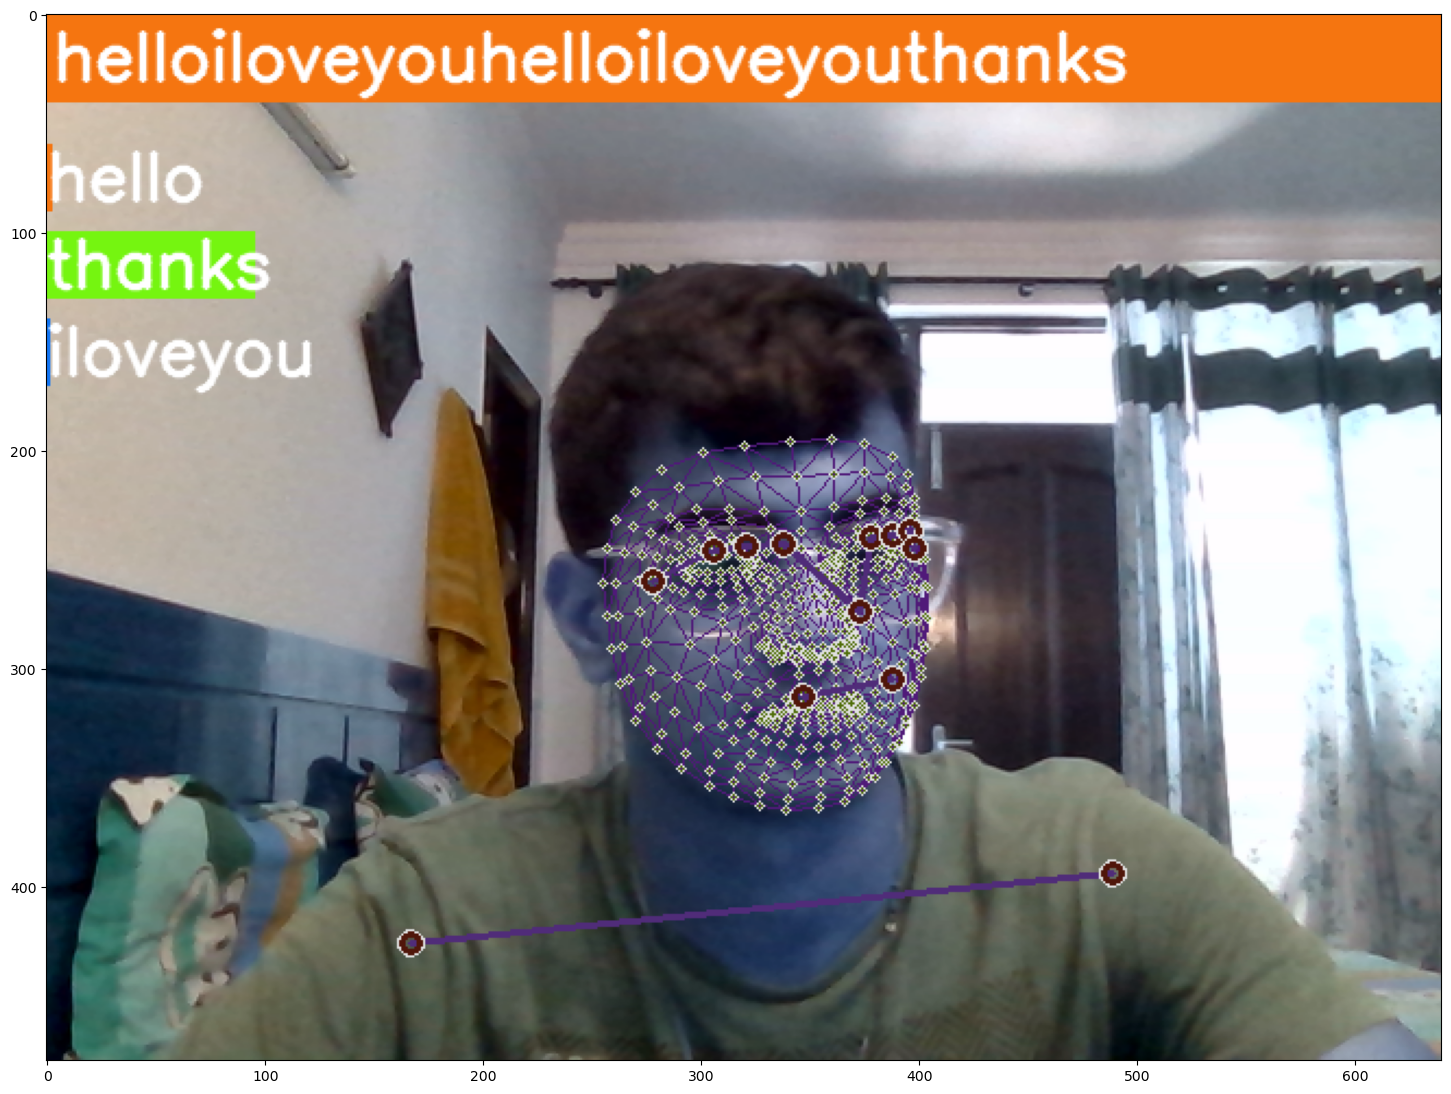

In [114]:
plt.figure(figsize= (18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [116]:
#1. new detection variables
sequence = []
sentence = []
threshold = 0.7


cap= cv2.VideoCapture(0)

#Access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read feed
        ret, frame = cap.read()


        #make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #draw landmarks
        draw_landmarks(image, results)
        
        #2. Prediction logic 
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[:30]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
        #3. Viz Logic
        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
        if len(sentence) > 5:
            sentence = sentence[-5:]
            
        #viz prob
        #image = prob_viz(res, actions, input_frame, colors)    
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ''.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        #show to screen
        cv2.imshow('OpenCV Feed', image)

        #break from loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti